### Sores for Final Model


Final_Test_MetricsBase_CNN
{'precision': 0.8624338624338624, 'recall': 0.815, 'f1-score': 0.8380462724935733} cloth_mask
{'precision': 0.8317307692307693, 'recall': 0.865, 'f1-score': 0.8480392156862744} no_face_mask
{'precision': 0.7971698113207547, 'recall': 0.845, 'f1-score': 0.8203883495145631} surgical_mask
{'precision': 0.8697916666666666, 'recall': 0.835, 'f1-score': 0.8520408163265306} n95_mask
{'precision': 0.9296482412060302, 'recall': 0.925, 'f1-score': 0.9273182957393483} mask_worn_incorrectly
Overall acc:  0.857


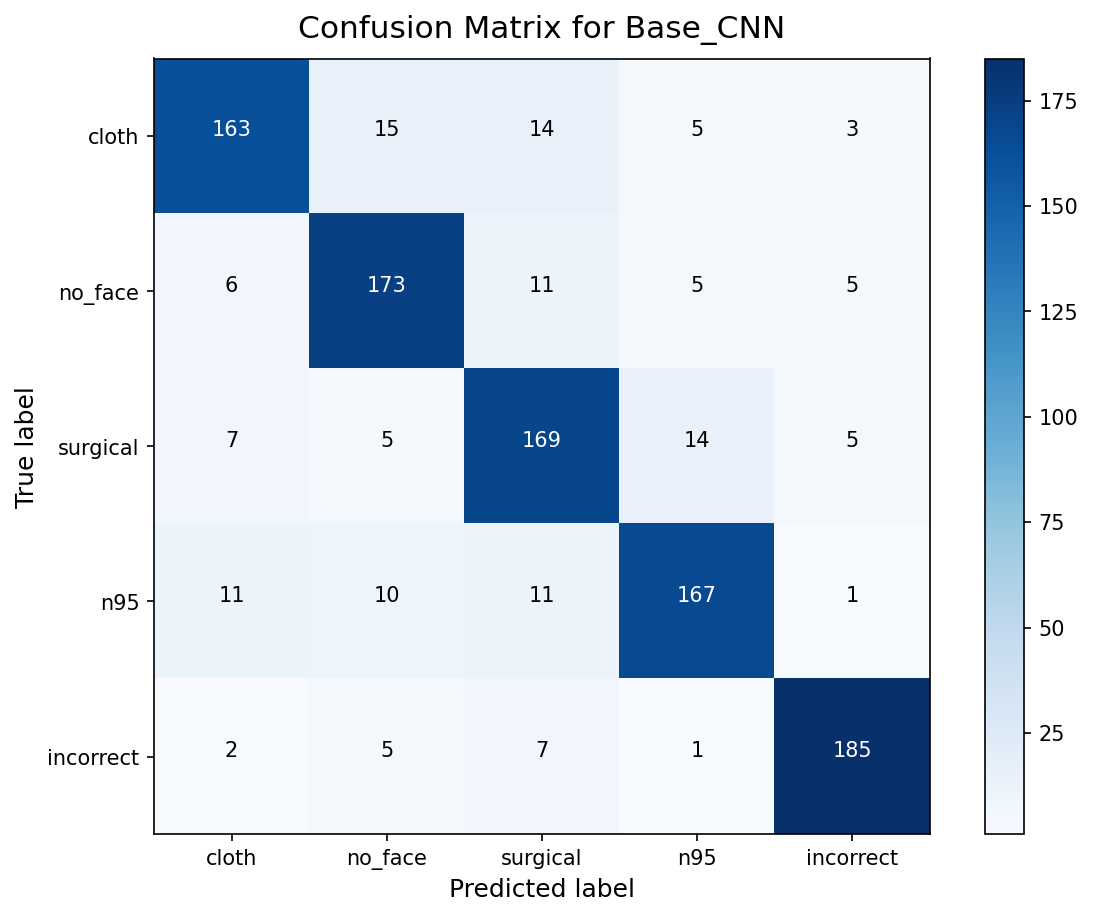


Final_Test_MetricsLess_Conv
{'precision': 0.7317073170731707, 'recall': 0.75, 'f1-score': 0.7407407407407408} cloth_mask
{'precision': 0.806930693069307, 'recall': 0.815, 'f1-score': 0.8109452736318408} no_face_mask
{'precision': 0.6534653465346535, 'recall': 0.66, 'f1-score': 0.6567164179104478} surgical_mask
{'precision': 0.7120418848167539, 'recall': 0.68, 'f1-score': 0.6956521739130435} n95_mask
{'precision': 0.82, 'recall': 0.82, 'f1-score': 0.82} mask_worn_incorrectly
Overall acc:  0.745


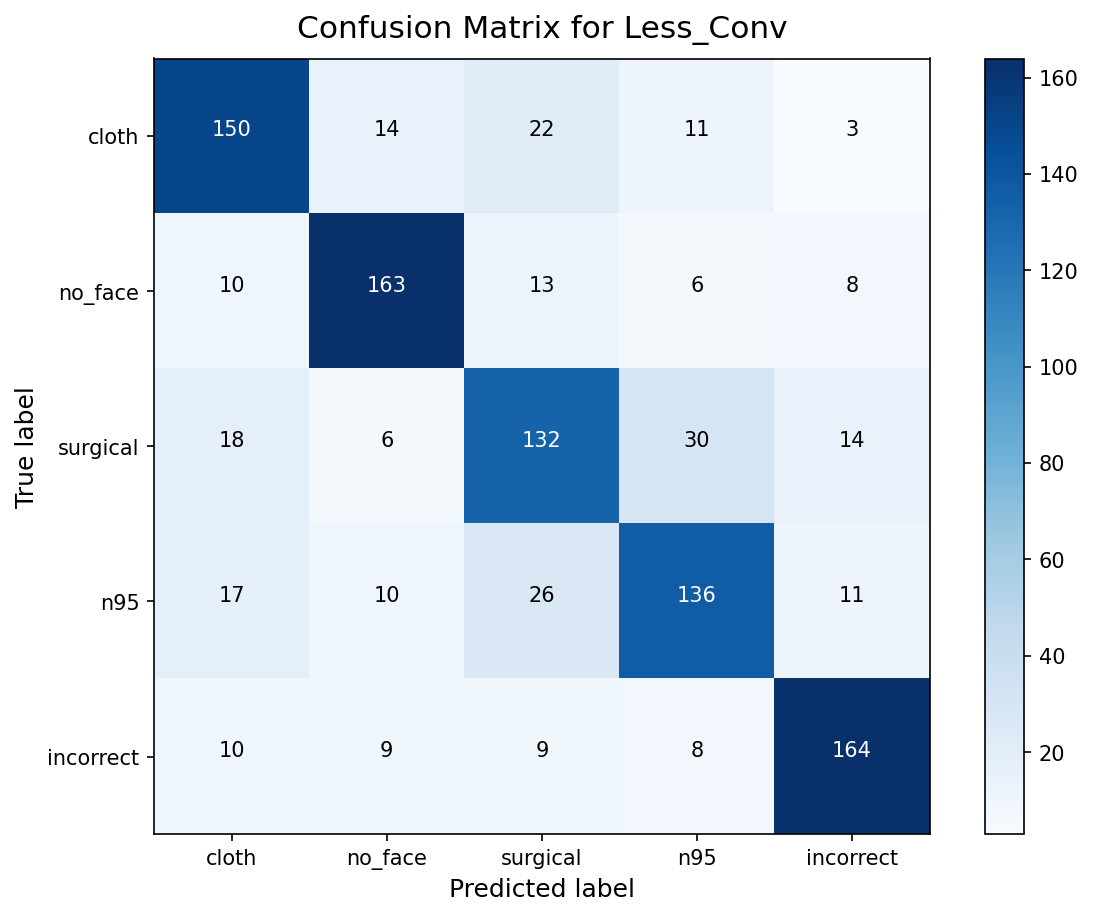


Final_Test_MetricsLess_Pooling
{'precision': 0.8453038674033149, 'recall': 0.765, 'f1-score': 0.8031496062992125} cloth_mask
{'precision': 0.8341232227488151, 'recall': 0.88, 'f1-score': 0.8564476885644767} no_face_mask
{'precision': 0.7596153846153846, 'recall': 0.79, 'f1-score': 0.7745098039215687} surgical_mask
{'precision': 0.8481675392670157, 'recall': 0.81, 'f1-score': 0.8286445012787724} n95_mask
{'precision': 0.8851674641148325, 'recall': 0.925, 'f1-score': 0.9046454767726161} mask_worn_incorrectly
Overall acc:  0.834


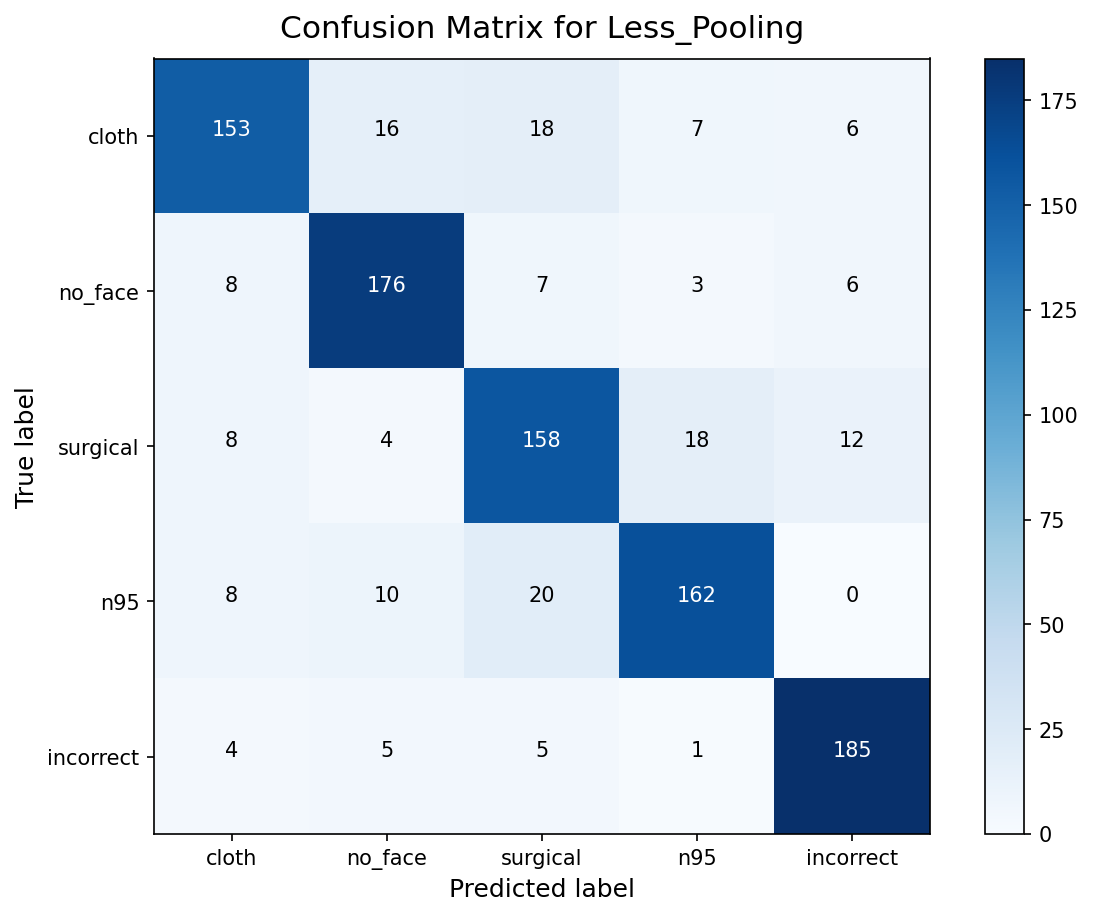

In [46]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from data_process.DatasetHelper import label_map

model_names = ['Base_CNN', 'Less_Conv', 'Less_Pooling']

# draw a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6), dpi=150)
    """
    - cm :  calculate the value of the confusion matrix
    - classes : class for every row/column
    - normalize : True:show percentage, False:show counts
    """
    if normalize:   #for calculating the percentage
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("show percentage：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #interpolation = 'nearest': when the display resolution is different with our image,
    #our script will output the image without adding other values between pixels.
    #https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
    plt.title(title, fontsize=15, pad=10) # adding our title 
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)#deciding what labels will be shown on x axis
    plt.yticks(tick_marks, classes)# deciding what labels will be shown on y axis
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)  #y axis label
    plt.xlabel('Predicted label', fontsize=12)  #x axis label
    plt.show()
    
    # print(cm.diagonal()/cm.sum(axis=1))

labels_name = ['cloth', 'no_face', 'surgical', 'n95', 'incorrect']

def read_socres(model_name):
    print(model_name)
    with open(f'{model_name}.npy', 'rb') as f:
        a = np.load(f, allow_pickle=True)
        # print(a.item().keys())
        
        for k in label_map.keys():
            del a.item()['report'][label_map[k]]['support']
            print(a.item()['report'][label_map[k]], label_map[k],)
        print('Overall acc: ', a.item()['acc'])
        # print(a.item()['pre'])
        # print(a.item()['rec'])
        # print(a.item()['f1'])
        plot_confusion_matrix(a.item()['conf_m'], classes=labels_name, title=f"Confusion Matrix for {model_name.replace('Final_Test_Metrics', '')}")
        
for k in ['Final_Test_Metrics' + n for n in model_names]:
    print()
    read_socres(k)